In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
ri = pd.read_csv('police_dataset.csv', low_memory=False)

In [21]:
ri.head()

,Unnamed: 0,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,0,RI,2005-01-02,01:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
1,1,RI,2005-01-02,20:30,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4
2,2,RI,2005-01-04,11:30,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,3,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
4,4,RI,2005-01-06,01:30,NaN,M,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [23]:
ri.shape

(509681, 16)

In [24]:
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [25]:
ri.shape

(509681, 14)

In [30]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)
print(ri.columns)

Unnamed: 0                 0
stop_date                  0
stop_time                  0
driver_gender              0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type           462822
stop_outcome               0
is_arrested                0
stop_duration              0
drugs_related_stop         0
district                   0
dtype: int64
Unnamed: 0                 0
stop_date                  0
stop_time                  0
driver_gender              0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type           462822
stop_outcome               0
is_arrested                0
stop_duration              0
drugs_related_stop         0
district                   0
dtype: int64
(480584, 14)
Index(['Unnamed: 0', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type'

In [37]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted      object
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [43]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri['search_conducted'] = ri.search_conducted.astype('bool')
ri['drugs_related_stop'] = ri.drugs_related_stop.astype('bool')

In [44]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [40]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
1,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4
3,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
4,2005-01-06,01:30,M,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
5,2005-01-12,08:05,M,Black,Call for Service,Other,False,NaN,Citation,False,30+ Min,False,Zone X1


In [41]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
print(ri.stop_datetime.dtype)

datetime64[ns]


In [45]:
# Set 'stop_datetime' as the index
ri.set_index(ri.stop_datetime, inplace=True)
print(ri.index)
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'stop_datetime'],
      dtype='object')


In [47]:
ri.driver_race.value_counts()

White       344716
Black        68577
Hispanic     53123
Asian        12824
Other         1344
Name: driver_race, dtype: int64

In [48]:
print(ri.violation.value_counts())
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64


In [49]:
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']

# Computing the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


In [50]:
# DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


In [51]:
print(ri.search_conducted.dtype)

# search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465


In [53]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64


In [54]:
#Counting Protective Frisks

In [67]:
print(ri.search_type.value_counts())

# if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

print(ri['frisk'].dtype)

# sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [68]:
#Time of the day effect arrest rate ? 

In [69]:
# overall arrest rate
print(ri.is_arrested.mean())

# hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


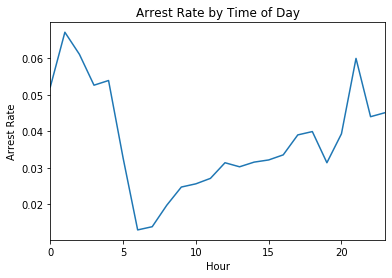

In [71]:
# line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()
